<h1><center> Math761 - HW 7 <br>
   Bootstrap, Jackknife, and EM</center> </h1>
   


## General Instructions

_This homework requires you two submit two things now and one thing later:_

1) A jupyter notebook (.ipynb file) which will include your code, the results from when you ran the code, and textual interpetations as asked in the questions.

2) A video (10 minute max, with 4 extra minutes if you do the EC).  Each question specifies the part you need to explain by video. For example, if part a of question 1 says "**Explain in Video**", then after you have finished writing up your work **(which may include math calculations as well as code)** to your satisfaction (or to the point where you have to submit before the deadline!), please record a video where you go over your work (math and code) and explain what each part of it does and the role each part plays in helping you to achieve the statistical goal of the question. Note that the whole video you submit for your whole assignment should be 10 minutes or less. If your video goes over the max limit, I will only grade or give feedback up to the max limit. This is so that I can give everyone feedback in a timely manner. It may be helpful if you rehearse your video before you record it or use a video editor (Da Vinci is free) to help you keep your video under the time limit while letting you cover all the important information you want to explain.

3) No revision for this one! I'll grade the first two questions here.
<br>

_Grading_:
The grading rubric is here https://docs.google.com/document/d/1A_Gris-kMxTLneroCO2h0cvbsqmQTSkYc2WQGSsgURU/edit?usp=sharing. 




<br>

### Exercise 1

**Explain all parts in video**

Consider the `scor` data from the `bootstrap` package. It gives the test scores for 88 students in five subjects: mechanics, vectors, algebra, analysis, and statistics. 

In [4]:
data("scor", package="bootstrap")
scor


,mec,vec,alg,ana,sta
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,77,82,67,67,81
2,63,78,80,70,81
3,75,73,71,66,81
4,55,72,63,70,68
5,63,63,65,70,63
6,53,61,72,64,73
7,51,67,65,65,68
8,59,70,68,62,56
9,62,60,58,62,70


#### a) Because mechanics and vectors were closed book tests while the other three subjects were open book tests, it can be interesting to look at the correlation between mechanics and vectors versus the correlation between analysis and statistics versus the correlation between mechanics and statistics. Report these three correlations and then find the bootstrap estimates of the standard error and bias of the sample correlations. Use 2000 bootstrap replications for each. Then please combine these results in a table. Also make  histograms of the bootstrapped correlations (3, one for each correlation). 

**hint** When I use set.seed(1), the bootstrapped bias between Mechanics and Vectors is `-0.0057183621`.

#### b) Also report the jackknife estimates of the bias and standard error for the sample correlations (between mechanics and vectors; between analysis and statistics; and between mechanics and statistics). Please put these in a table as well and make histograms!

**hint** For the jackknifed bias between Mechanics and Vectors, I got `-0.005038`.


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.

### (a)

In [5]:
#Set the seed to 1
set.seed(1)

#Define the required variables
bootstrap_reps = 2000
n_rows = nrow(scor)

# Define null vectors to store the resultant correlations
mv_cor <- numeric(bootstrap_reps)
as_cor <- numeric(bootstrap_reps)
ms_cor <- numeric(bootstrap_reps)

#Define Resampling function
resample <- function(data) {
    indices <- sample(1:n_rows, replace = TRUE)
    data[indices, ]
}

# Perform Bootstrap analysis
for (i in 1:bootstrap_reps) {
    # Resample the entire dataset
    sampled_data <- resample(scor)
    
    # Calculate correlations for the pairs
    mv_cor[i] <- cor(sampled_data$mec, sampled_data$vec)
    as_cor[i] <- cor(sampled_data$ana, sampled_data$sta)
    ms_cor[i] <- cor(sampled_data$mec, sampled_data$sta)
}

# Calculate original correlations
mec_vec_cor <- cor(scor$mec, scor$vec)
ana_sta_cor <- cor(scor$ana, scor$sta)
mec_sta_cor <- cor(scor$mec, scor$sta)

#Calculate the standard deviation for each correlation vector
sd_mv <- sd(mv_cor)
sd_as <- sd(as_cor)
sd_ms <- sd(ms_cor)

#Calculate the bias for each correlation vector
bias_mv <- mean(mv_cor) - mec_vec_cor
bias_as <- mean(as_cor) - ana_sta_cor
bias_ms <- mean(ms_cor) - mec_sta_cor

result_df <- data.frame(Pair = c("Mec_Vec", "Ana_Sta", "Mec_Sta"), Original_Correlation = c(mec_vec_cor, ana_sta_cor, mec_sta_cor), 
                       Bootstrap_SE = c(sd_mv, sd_as, sd_ms), Bootstrap_Bias = c(bias_mv, bias_as, bias_ms))

result_df

Pair,Original_Correlation,Bootstrap_SE,Bootstrap_Bias
<chr>,<dbl>,<dbl>,<dbl>
Mec_Vec,0.5534052,0.07565361,-0.005718362
Ana_Sta,0.6071743,0.06759854,-0.002754829
Mec_Sta,0.3890993,0.10150153,-0.003150250


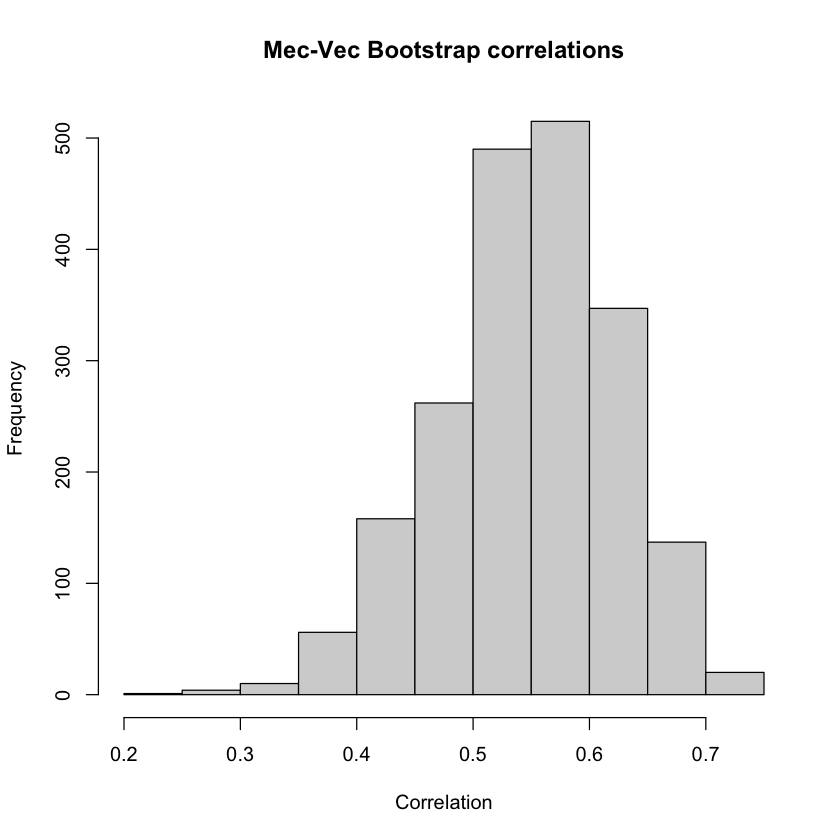

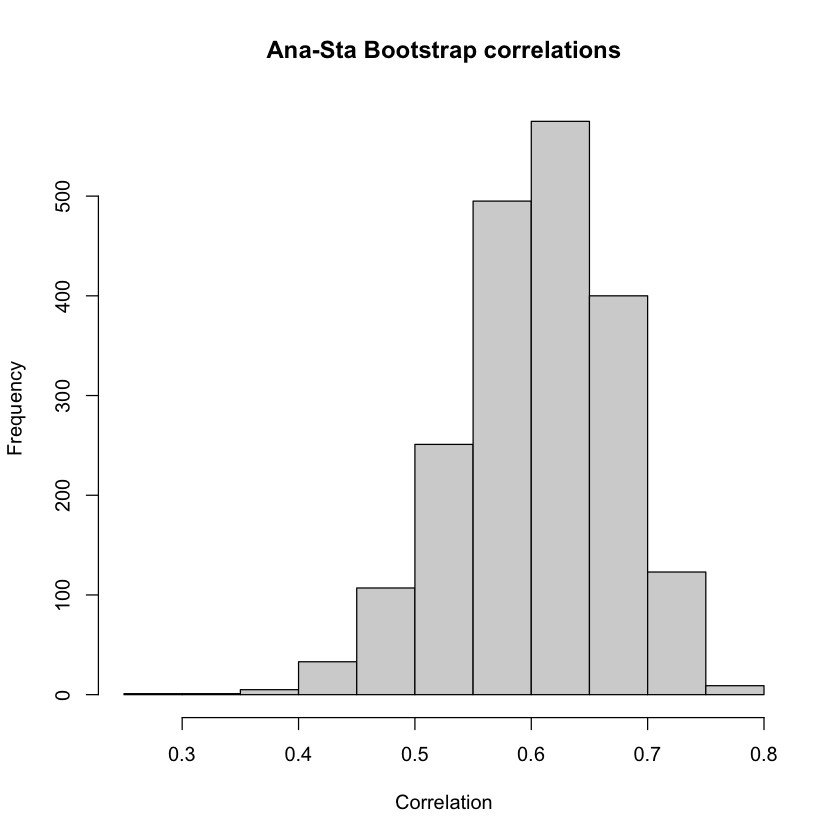

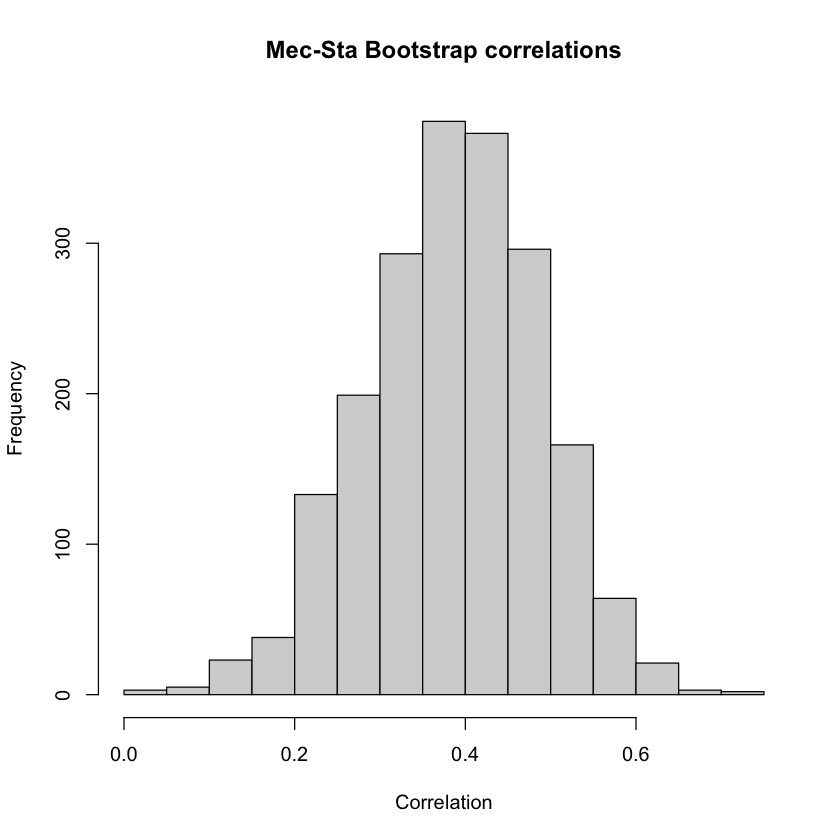

In [6]:
#Plot histogram
hist(mv_cor, main = "Mec-Vec Bootstrap correlations", xlab = "Correlation")
hist(as_cor, main = "Ana-Sta Bootstrap correlations", xlab = "Correlation")
hist(ms_cor, main = "Mec-Sta Bootstrap correlations", xlab = "Correlation")

### (b)

In [7]:
# Set the seed to 1
set.seed(1)

# Define the required variables
n_rows <- nrow(scor)

# Define null vectors to store the jackknife correlations
mv_cor <- numeric(n_rows)
as_cor <- numeric(n_rows)
ms_cor <- numeric(n_rows)

# Calculate original correlations
mec_vec_cor <- cor(scor$mec, scor$vec)
ana_sta_cor <- cor(scor$ana, scor$sta)
mec_sta_cor <- cor(scor$mec, scor$sta)

# Perform Jackknife analysis
for (i in 1:n_rows) {
    # Remove one observation at a time
    jackknife_data <- scor[-i, ]
    
    # Calculate correlations for the pairs
    mv_cor[i] <- cor(jackknife_data$mec, jackknife_data$vec)
    as_cor[i] <- cor(jackknife_data$ana, jackknife_data$sta)
    ms_cor[i] <- cor(jackknife_data$mec, jackknife_data$sta)
}

# Calculate Jackknife mean for each correlation vector
mean_mv <- mean(mv_cor)
mean_as <- mean(as_cor)
mean_ms <- mean(ms_cor)

# Calculate Jackknife bias
bias_mv <- (n_rows - 1) * (mean_mv - mec_vec_cor)
bias_as <- (n_rows - 1) * (mean_as - ana_sta_cor)
bias_ms <- (n_rows - 1) * (mean_ms - mec_sta_cor)

# Calculate Jackknife standard error
se_mv <- sqrt((n_rows - 1) / n_rows * sum((mv_cor - mean_mv)^2))
se_as <- sqrt((n_rows - 1) / n_rows * sum((as_cor - mean_as)^2))
se_ms <- sqrt((n_rows - 1) / n_rows * sum((ms_cor - mean_ms)^2))

# Combine results into a data frame
result_df <- data.frame(
    Pair = c("Mec_Vec", "Ana_Sta", "Mec_Sta"),
    Original_Correlation = c(mec_vec_cor, ana_sta_cor, mec_sta_cor),
    Jackknife_Bias = c(bias_mv, bias_as, bias_ms),
    Jackknife_SE = c(se_mv, se_as, se_ms)
)
result_df

Pair,Original_Correlation,Jackknife_Bias,Jackknife_SE
<chr>,<dbl>,<dbl>,<dbl>
Mec_Vec,0.5534052,-0.005038361,0.07752814
Ana_Sta,0.6071743,-0.001465958,0.06918566
Mec_Sta,0.3890993,-0.003461832,0.11040404


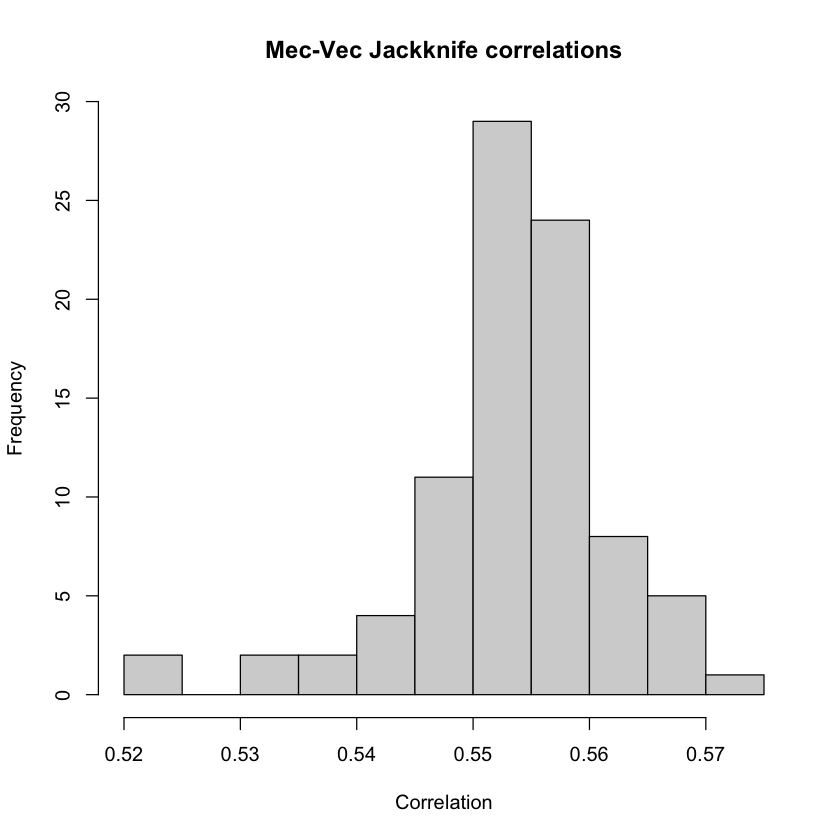

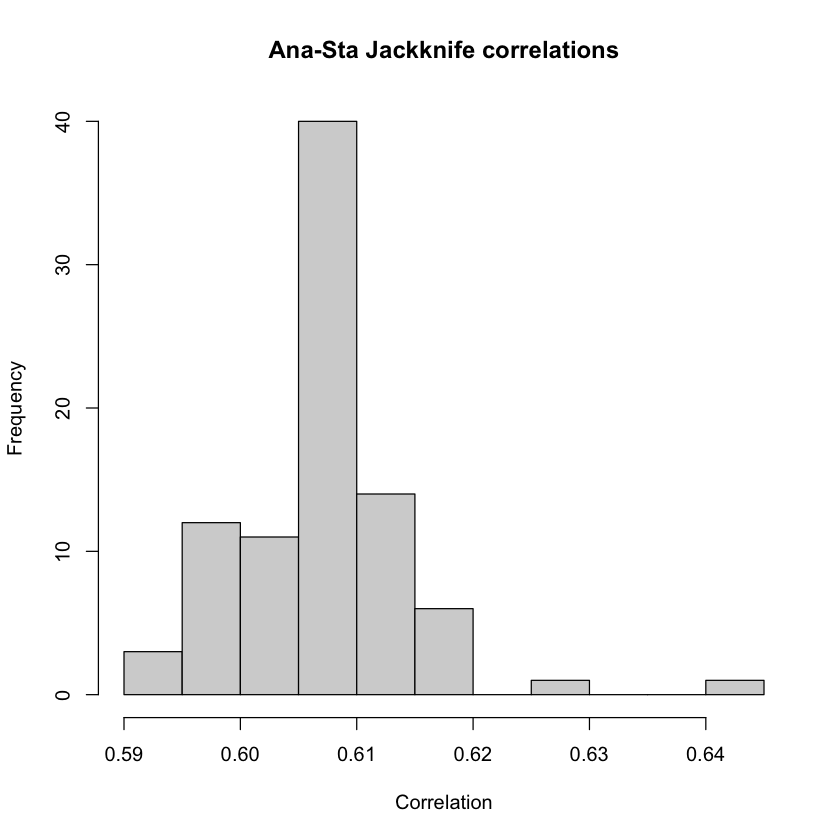

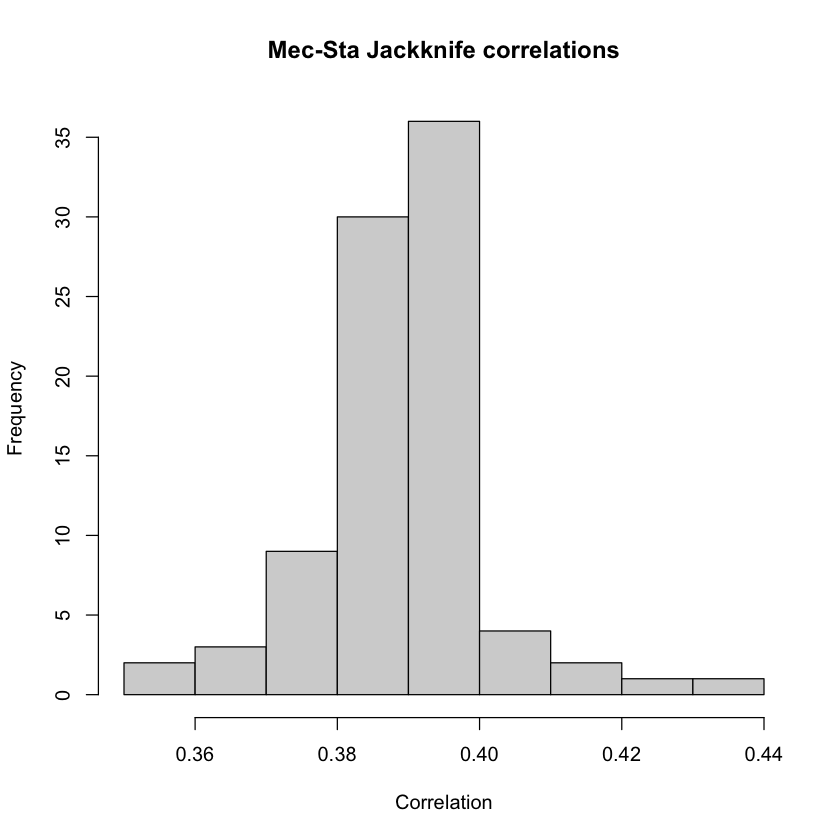

In [58]:
# Plot histograms of jackknife correlations
hist(mv_cor, main = "Mec-Vec Jackknife correlations", xlab = "Correlation")
hist(as_cor, main = "Ana-Sta Jackknife correlations", xlab = "Correlation")
hist(ms_cor, main = "Mec-Sta Jackknife correlations", xlab = "Correlation")

### (c)

Looking at the relationship between the bias and the standard error, a common guideline is that a bias is only significant if it exceeds half the standard error. In this case, the biases for all three correlation pairs are noticeably much smaller than their corresponding standard errors. This indicates that the biases are negligible and don’t require any adjustments. Hence, the sample correlations are reliable and robust estimates of the true population correlations.

### Exercise 2

**Explain all parts in video**

In principle component analysis,

$$
\theta = \frac{\lambda_1}{\sum_{j=1}^{5}\lambda_j}
$$

represents the amount of variance explained by the largest eigenvector (to which this eigenvalue corresponds), which you can get by eigenvalue decomposition of the correlation matrix $\Sigma$. The eigenvector corresponding to the largest eigenvalue gives you the direction in which the data varies most!

For the data in `scor`, you can estimate $\theta$ using

$$
\hat{\theta} = \frac{\hat{\lambda_1}}{\sum_{j=1}^{5}\hat{\lambda_j}}
$$

by following these steps:

1. Calculate sample correlation $\hat{\Sigma}$
2. Use eigenvalue decomposition to get $\hat{\lambda_i}$ for i = 1, ..., 5
3. Let the largest $\hat{\lambda_i}$ be $\hat{\lambda_1}$
4. Compute $\hat{\theta}$ from your obtained values


#### a) Compute the se and bias of this estimator using 2000 bootstrap estimates. Put the results in a table please and draw a histogram of the bootstrapped esitmates!

** Hint** For the bootstrapped bias, with set.seed(1), I got `-0.001415296`.

#### b) Compute the se and bias of this estimator using the jackknife estimates. Put the results in a table please and draw a histogram of the jackknifed estimates!

** Hint** For the jackknifed bias, I got `-0.0003778535`.


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.


### (a)

   Estimate    Theta         Bias         SE
1 Bootstrap 0.636196 -0.001415296 0.04208801


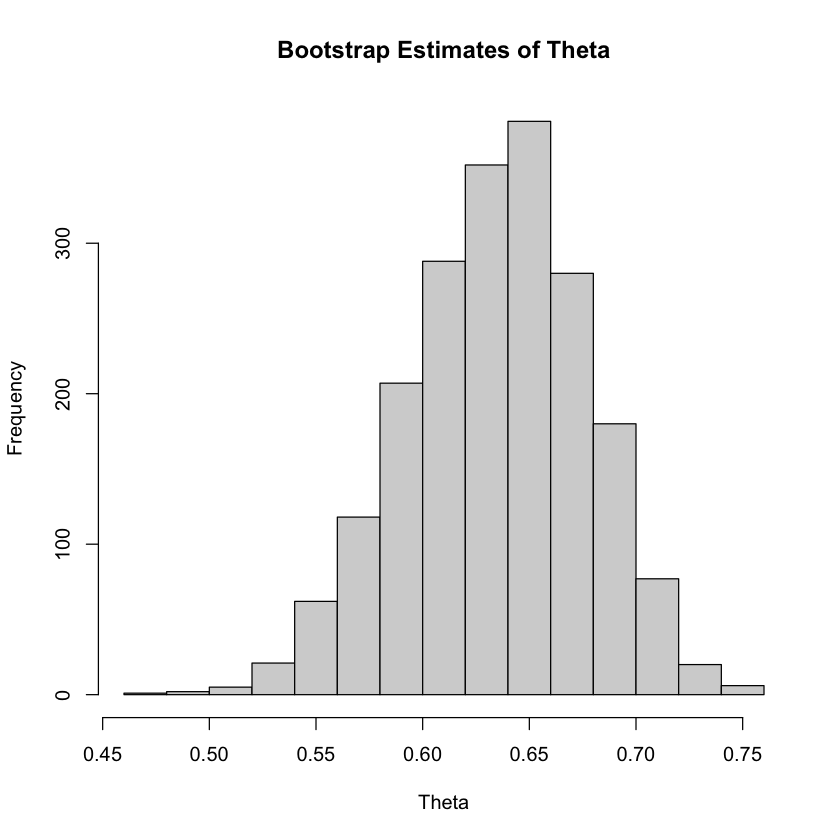

In [64]:
# Set the seed to 1
set.seed(1)

# Define the number of bootstrap samples
bootstrap_reps <- 2000
n_rows <- nrow(scor)

# Function to compute theta (variance explained by the largest eigenvector)
compute_theta <- function(data) {
  eigenvalues <- eigen(cor(data))$values
  largest_eigenvalue <- eigenvalues[1]
  theta <- largest_eigenvalue / sum(eigenvalues)
  return(theta)
}

# Compute the original theta value
original_theta <- compute_theta(scor)

# Perform bootstrap resampling
bootstrap_thetas <- numeric(bootstrap_reps)

for (i in 1:bootstrap_reps) {
  # Resample the data with replacement
  resampled_data <- scor[sample(1:n_rows, replace = TRUE), ]
  bootstrap_thetas[i] <- compute_theta(resampled_data)
}

# Compute standard error and bias
bootstrap_se <- sd(bootstrap_thetas)
bootstrap_bias <- mean(bootstrap_thetas) - original_theta

# Create a results table for bootstrap
bootstrap_results <- data.frame(
  Estimate = "Bootstrap",
  Theta = original_theta,
  Bias = bootstrap_bias,
  SE = bootstrap_se
)

# Print the results
print(bootstrap_results)

# Plot histogram of bootstrap estimates
hist(bootstrap_thetas, main = "Bootstrap Estimates of Theta", xlab = "Theta")

### (b)

   Estimate    Theta          Bias         SE
1 Jackknife 0.636196 -0.0003778535 0.04466684


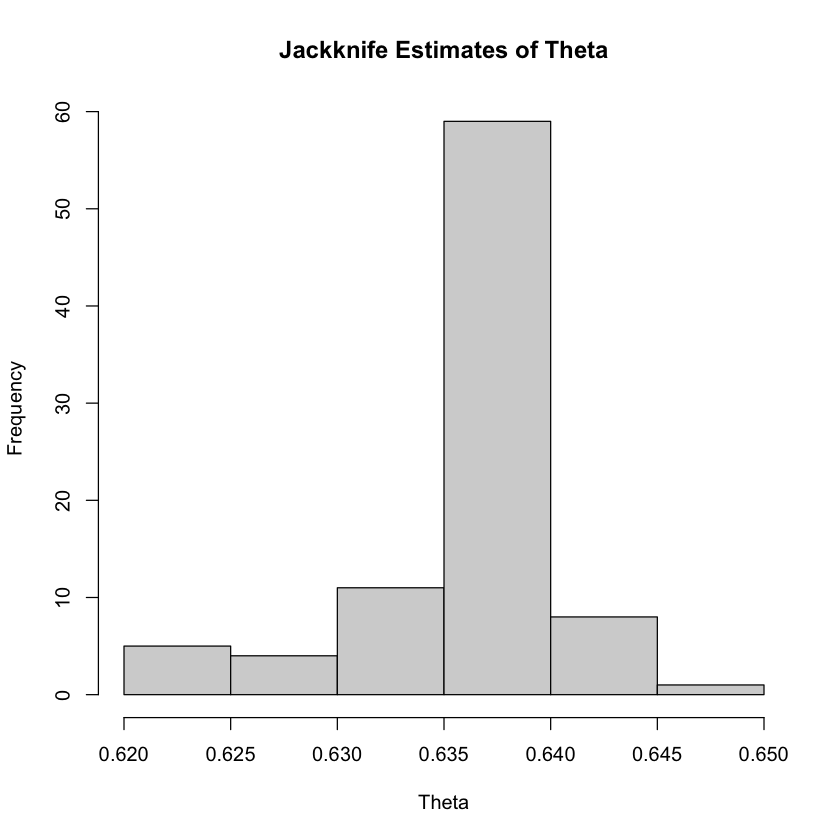

In [63]:
# Define the jackknife analysis
jackknife_thetas <- numeric(n_rows)

for (i in 1:n_rows) {
  # Remove one observation at a time
  jackknife_data <- scor[-i, ]
  jackknife_thetas[i] <- compute_theta(jackknife_data)
}

# Compute the jackknife mean
jackknife_mean <- mean(jackknife_thetas)

# Compute jackknife bias
jackknife_bias <- (n_rows - 1) * (jackknife_mean - original_theta)

# Compute jackknife standard error
jackknife_se <- sqrt((n_rows - 1) / n_rows * sum((jackknife_thetas - jackknife_mean)^2))

# Create a results table for jackknife
jackknife_results <- data.frame(
  Estimate = "Jackknife",
  Theta = original_theta,
  Bias = jackknife_bias,
  SE = jackknife_se
)

# Print the results
print(jackknife_results)

# Plot histogram of jackknife estimates
hist(jackknife_thetas, main = "Jackknife Estimates of Theta", xlab = "Theta")


### (c)

Based on the results from both bootstrap and jackknife methods, the biases for the estimator theta_hat are significantly smaller than half their respective standard errors, which is the threshold. This indicates that the biases are negligible, and no adjustment is necessary. The sample estimate theta_hat is therefore robust and can be confidently interpreted as an unbiased representation of the proportion of variance explained by the largest eigenvalue in the population.

### Optional: Exercise 3 (worth 5 points EC on HW if you do it and explain it well)


You are presented with incomplete data from two coins, one copper and one silver. 
The copper coin has $p1$ probability of landing heads up while the silver coin has $p2$ probability of landing heads up.

The data you see below, called "X", consists of $100$ coin tosses, where one of the two coins is selected at random and then tossed. If the coin lands heads up, a 1 is recorded for that toss. Otherwise, a 0 is recorded. You do not know which coin is used for each toss.

Use the EM algorithm to estimate $p1$ and $p2$. Please show your work for how you derive $Q(\theta_{t}|\theta_{t-1}, X)$ as well as the code to implement the EM algorithm and produce estimates for $p1$ and $p2$.




In [2]:
X =c(1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,
     1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,
     1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,
     1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,
     1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1) 


### Self assessment:

Remember to take a moment to evaluate yourself on where you feel confident in your work and understanding and where you feel less confident in your work and understanding.